## Observations and Insights 

    Three observations made from the Pymaceuticals, Inc mouse study:  

1. Observing performance of Pymaceuticals’ drug of interest (Capomulin), we can see that the average tumour volume (mm3) is remarkably lower than in mice being treated with other drugs. With the exception of Ramicane treated mice which have average tumour volume on par with Capomulin. Each of these had tumour volume at 40.675 mm3 and 40.216 mm3 respectively, whilst all other regimens recorded >52 mm3

2. On viewing the line plot for Mouse s185, you can see the decrease in tumour volume over the course of treatment with a slight plateau around day 10 and proceeding to improve thereafter. This mouse was treated with Capomulin.

3. The gender ratio was almost evenly split and we can see clearly on our bar chart that a large proportion of timepoints per drug regimen were identified in mice treated with Capomulin (230 timepoints) and Ramicane (228 timepoints). This would indicate a larger dataset for each of these was studied.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

#..Both above & below output same values
# unique_mouse_ID=merged_df["Mouse ID"].unique()
# num_unique_mice=len(unique_mouse_ID)
# num_unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df=merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df.groupby("Mouse ID").count()

# Optional: Get all the data for the duplicate mouse ID.
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_removed=merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

duplicates_removed
# Kamal checked 22/10/22 

# Update existing df with mouse ID not equal to duplicates
# merged_df=merged_df[merged_df["Mouse ID"]!="g989"]
# merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Show the udpated number of unique mice ID's in the clean DataFrame.
# len(merged_df['Mouse ID'].unique())
len(duplicates_removed['Mouse ID'].unique())

248

## Summary Statistics

In [11]:
# Use groupby and summary statistical methods to calculate mean, median, variance, standard deviation, and SEM of the tumour volume for each drug regimen. 
grouped_drug_regimen_df=duplicates_removed.groupby(["Drug Regimen"])
# grouped_drug_regimen_df.count() 

In [12]:
# Create the dataframe for tumour summary stats per drug with row for each drug 
# A column for: mean, median, variance, standard deviation, and SEM of the tumour volume

tumour_vol_mean=grouped_drug_regimen_df["Tumour Volume (mm3)"].mean()
tumour_vol_med=grouped_drug_regimen_df["Tumour Volume (mm3)"].median()
tumour_vol_var=grouped_drug_regimen_df["Tumour Volume (mm3)"].var()
tumour_vol_stdev=grouped_drug_regimen_df["Tumour Volume (mm3)"].std()
tumour_vol_SEM=grouped_drug_regimen_df["Tumour Volume (mm3)"].sem()

# Create a DataFrame of summary statistics.
summary_stats_df=pd.DataFrame({"Tumour Volume Mean":tumour_vol_mean,
                               "Tumour Volume Median":tumour_vol_med,
                               "Tumour Volume Variance":tumour_vol_var,
                               "Tumour Volume Std.Dev.":tumour_vol_stdev,
                               "Tumour Volume Std. EoM":tumour_vol_SEM})

summary_stats_df=summary_stats_df[["Tumour Volume Mean",
                                  "Tumour Volume Median",
                                  "Tumour Volume Variance",
                                  "Tumour Volume Std.Dev.",
                                  "Tumour Volume Std. EoM"]]
summary_stats_df

,Tumour Volume Mean,Tumour Volume Median,Tumour Volume Variance,Tumour Volume Std.Dev.,Tumour Volume Std. EoM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
# summary_stats_df.agg(["mean", "median", "var", "std", "sem"], axis=1)
# agg_summary_df =summary_stats_df.agg(["mean", "median", "var", "std", "sem"], axis="columns")
# agg_summary_df

# https://pbpython.com/groupby-agg.html
# Here i defined the Tumour Vol column as {dictionary} & aggregations in [list] being applied to column 
agg_summary_df = {"Tumour Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']}
# Use groupby to find tumour summary stats per drug with aggregate summary. Note to self: DF must be original, NOT the summary stats df or it produces mean, med, var etc of that df!
duplicates_removed.groupby(['Drug Regimen']).agg(agg_summary_df)

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Checking the count per drug regimen
drug_reg=duplicates_removed["Drug Regimen"].value_counts()
drug_reg

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

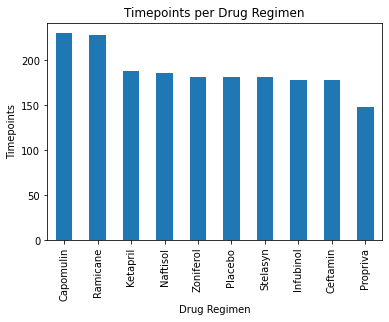

In [15]:
# Creating bar plot using drug_reg showing the total number of timepoints for all mice tested per drug regimen using Pandas.
# Pandas default left as x axis, right as y axis
drug_reg.plot(kind="bar")

# Set title & labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()


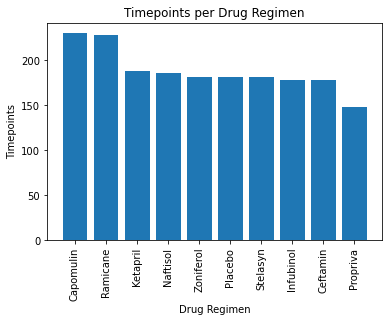

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_reg=duplicates_removed["Drug Regimen"].value_counts()

# Create bar plot. Identify drug_reg as index for pyplot
plt.bar(drug_reg.index.values,drug_reg.values)

# Set title & labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Timepoints")

plt.show()


Male      958
Female    922
Name: Sex, dtype: int64


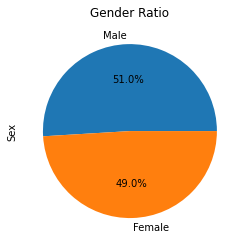

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Look at the gender split
gender=duplicates_removed["Sex"].value_counts()
print(gender)

# Create pie plot. Format %, 1 decimal
gender.plot(kind="pie",autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.show()


Male      958
Female    922
Name: Sex, dtype: int64


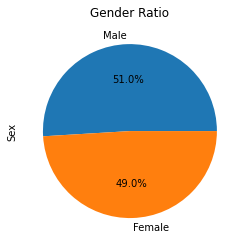

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=duplicates_removed["Sex"].value_counts()
print(gender)
# Create pie plot & labels
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumour volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a grouped DataFrame that shows the last (greatest) timepoint for each mouse
max_tumour = duplicates_removed.groupby(["Mouse ID"])['Timepoint'].max()
max_tumour = max_tumour.reset_index()
max_tumour

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
tumour_vol_merged = max_tumour.merge(duplicates_removed,on=['Mouse ID','Timepoint'],how="left")
tumour_vol_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put 4 selected treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list = []

# Loop through each drug in the treatment list above
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    
    # Locate the rows which contain mice on each drug and get the tumour volumes from merged tumour vol. 
    final_tumour_vol = tumour_vol_merged.loc[tumour_vol_merged["Drug Regimen"] == drug, 'Tumour Volume (mm3)']

    
    # Append the resulting final tumour volumes for each drug to the empty list.
    tumour_vol_list.append(final_tumour_vol)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
#     print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
#     print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
#     print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
#     print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
    
    outliers = final_tumour_vol.loc[(final_tumour_vol < lower_bound) | (final_tumour_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)


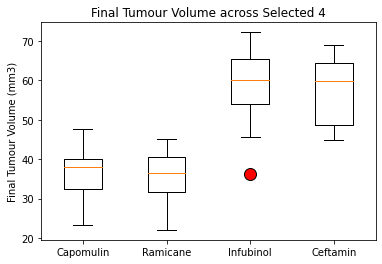

In [25]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumour_vol_list, labels = treatment_list,flierprops=orange_out)
plt.title('Final Tumour Volume across Selected 4')
plt.ylabel('Final Tumour Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [26]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_mice = duplicates_removed.loc[duplicates_removed['Drug Regimen'] == "Capomulin"]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


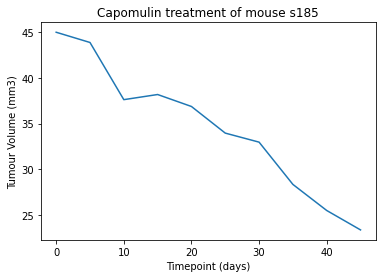

In [27]:
# Selected mouse ID 's185' 
mousedata = capomulin_mice.loc[capomulin_mice['Mouse ID']== 's185']
# Line chart & labels
plt.plot(mousedata['Timepoint'],mousedata['Tumour Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()


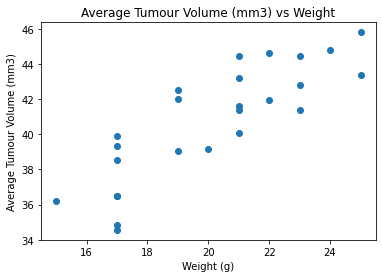

In [28]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_table = duplicates_removed.loc[duplicates_removed['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title('Average Tumour Volume (mm3) vs Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


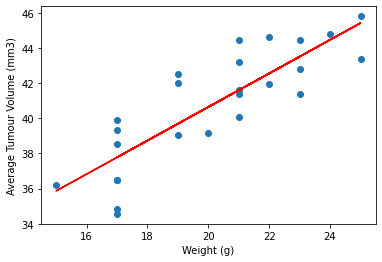

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()
